In [126]:
#CISC 452 final project code submission
#Submitted by: Zarrin Tasnim,  Student ID: 20100327

#LSTM model implementation

#original code: David Peter: https://www.kaggle.com/code/davidoluwatobipeter/sentiment-analysis-logistic-regression-and-lstm
#Peter Nagy: https://www.kaggle.com/code/ngyptr/lstm-sentiment-analysis-keras

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re

import seaborn as sns


In [127]:
#reading dataset files
trainData = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
testData = pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')

In [128]:
trainData

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [129]:
testData

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [130]:
#concatenate train and test to perform data preprocessing altogether. adding identity column to be able to differentiate.
#identity=0 is train and identity=1 is test

trainData['Identity'] = 0
testData['Identity'] = 1 
covid = pd.concat([trainData, testData])
covid.reset_index(drop=True, inplace=True)

In [131]:
covid

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Identity
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,0
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,0
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0
...,...,...,...,...,...,...,...
44950,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,1
44951,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,1
44952,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,1
44953,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,1


In [132]:
#this step was in original code by David, but we don't need this step, we will work with 5 categories

#for easier processing, we will work with 3 categories instead of 5. we will change extremely positive to positive and
#extremely negative to negative

#covid['Sentiment'] = covid['Sentiment'].str.replace('Extremely Positive', 'Positive')
#covid['Sentiment'] = covid['Sentiment'].str.replace('Extremely Negative', 'Negative')

In [133]:
#covid

In [134]:
# drop columns UserName, ScreenName, Location, TweetAt
covid = covid.drop('ScreenName', axis=1)
covid = covid.drop('UserName', axis=1)
covid = covid.drop('Location', axis=1)
covid = covid.drop('TweetAt', axis=1)
covid

,OriginalTweet,Sentiment,Identity
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,advice Talk to your neighbours family to excha...,Positive,0
2,Coronavirus Australia: Woolworths to give elde...,Positive,0
3,My food stock is not the only one which is emp...,Positive,0
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0
...,...,...,...
44950,Meanwhile In A Supermarket in Israel -- People...,Positive,1
44951,Did you panic buy a lot of non-perishable item...,Negative,1
44952,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,1
44953,Gov need to do somethings instead of biar je r...,Extremely Negative,1


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

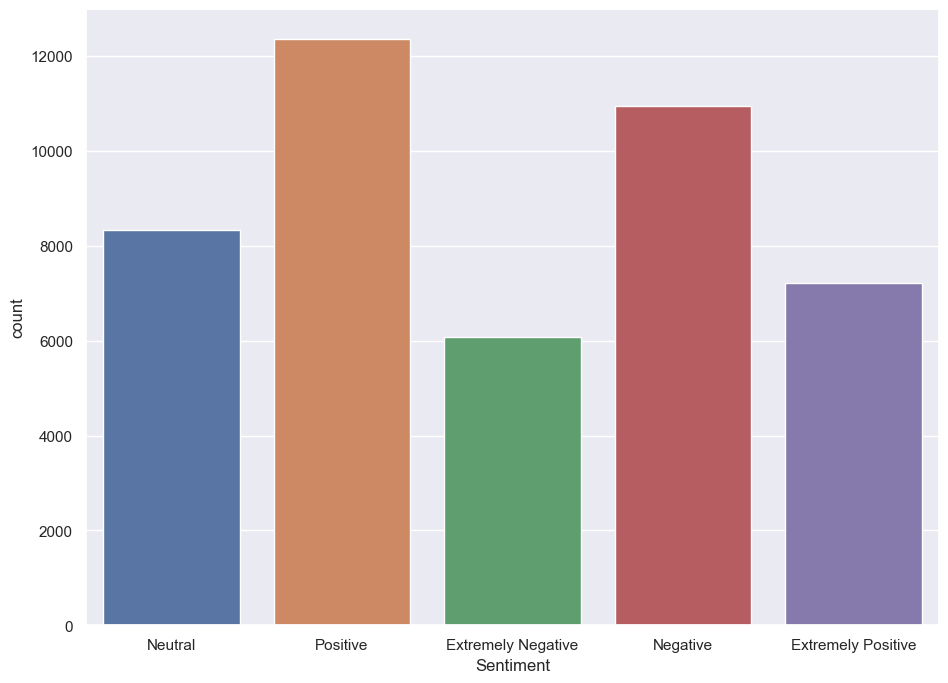

In [135]:
#lets visualize our dataset
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,8)})
sns.countplot(covid['Sentiment'])

In [136]:
#we remap the sentiments to numerical categories for easier classification
#Extreme negative(0), negative(1), netural(2), positive(3) and extreme positive(4)
covid['Sentiment'] = covid['Sentiment'].map({'Extremely Negative':0, 'Negative':1, 'Neutral':2, 'Positive': 3, 'Extremely Positive':4})

In [137]:
#function to clean all hashtags, mentions, digits, symbols and stopwords
#stopwords are high frequency words such as 'a' or 'the'
def clean(text):
    text = re.sub(r'http\S+', " ", text)
    text = re.sub(r'@\w+',' ',text)
    text = re.sub(r'#\w+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub('r<.*?>',' ', text)
    text = text.split()
    text = " ".join([word for word in text if not word in stopWord])
    
    return text

In [138]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [139]:
stopWord = stopwords.words('english')

In [140]:
covid['OriginalTweet'] = covid['OriginalTweet'].apply(lambda x: clean(x))

In [141]:
covid

,OriginalTweet,Sentiment,Identity
0,,2,0
1,advice Talk neighbours family exchange phone n...,3,0
2,Coronavirus Australia: Woolworths give elderly...,3,0
3,"My food stock one empty... PLEASE, panic, THER...",3,0
4,"Me, ready go supermarket outbreak. Not I'm par...",0,0
...,...,...,...
44950,Meanwhile In A Supermarket Israel -- People da...,3,1
44951,Did panic buy lot non-perishable items? ECHO n...,1,1
44952,Asst Prof Economics talking recent research co...,2,1
44953,Gov need somethings instead biar je rakyat ass...,0,1


In [142]:
#change all uppercase letters to lower case
covid['OriginalTweet'] = covid['OriginalTweet'].apply(lambda x: x.lower())

In [143]:
covid

,OriginalTweet,Sentiment,Identity
0,,2,0
1,advice talk neighbours family exchange phone n...,3,0
2,coronavirus australia: woolworths give elderly...,3,0
3,"my food stock one empty... please, panic, ther...",3,0
4,"me, ready go supermarket outbreak. not i'm par...",0,0
...,...,...,...
44950,meanwhile in a supermarket israel -- people da...,3,1
44951,did panic buy lot non-perishable items? echo n...,1,1
44952,asst prof economics talking recent research co...,2,1
44953,gov need somethings instead biar je rakyat ass...,0,1


In [144]:
import nltk

#nltk.download('wordnet')
#nltk.download('omw-1.4')

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [145]:
#lemmatize, tokenizing and vectorizing data
covid['Corpus'] = [nltk.word_tokenize(text) for text in covid.OriginalTweet]
lemma = nltk.WordNetLemmatizer()
covid.Corpus = covid.apply(lambda x: [lemma.lemmatize(word) for word in x.Corpus], axis=1)
covid.Corpus = covid.apply(lambda x: " ".join(x.Corpus),axis=1)


In [146]:
covid

,OriginalTweet,Sentiment,Identity,Corpus
0,,2,0,
1,advice talk neighbours family exchange phone n...,3,0,advice talk neighbour family exchange phone nu...
2,coronavirus australia: woolworths give elderly...,3,0,coronavirus australia : woolworth give elderly...
3,"my food stock one empty... please, panic, ther...",3,0,"my food stock one empty ... please , panic , t..."
4,"me, ready go supermarket outbreak. not i'm par...",0,0,"me , ready go supermarket outbreak . not i 'm ..."
...,...,...,...,...
44950,meanwhile in a supermarket israel -- people da...,3,1,meanwhile in a supermarket israel -- people da...
44951,did panic buy lot non-perishable items? echo n...,1,1,did panic buy lot non-perishable item ? echo n...
44952,asst prof economics talking recent research co...,2,1,asst prof economics talking recent research co...
44953,gov need somethings instead biar je rakyat ass...,0,1,gov need somethings instead biar je rakyat ass...


In [147]:
#split train and test data

train = covid[covid.Identity==0]
test = covid[covid.Identity==1]
train.drop('Identity',axis=1, inplace=True)
test.drop('Identity',axis=1, inplace=True)
test.reset_index(drop=True,inplace=True)

C:\Users\Zarrin\AppData\Local\Temp\ipykernel_41184\1019011373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Identity',axis=1, inplace=True)
C:\Users\Zarrin\AppData\Local\Temp\ipykernel_41184\1019011373.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('Identity',axis=1, inplace=True)


In [148]:
train

,OriginalTweet,Sentiment,Corpus
0,,2,
1,advice talk neighbours family exchange phone n...,3,advice talk neighbour family exchange phone nu...
2,coronavirus australia: woolworths give elderly...,3,coronavirus australia : woolworth give elderly...
3,"my food stock one empty... please, panic, ther...",3,"my food stock one empty ... please , panic , t..."
4,"me, ready go supermarket outbreak. not i'm par...",0,"me , ready go supermarket outbreak . not i 'm ..."
...,...,...,...
41152,airline pilots offering stock supermarket shel...,2,airline pilot offering stock supermarket shelf...
41153,response complaint provided citing covid- rela...,0,response complaint provided citing covid- rela...
41154,you know itâs getting tough rationing toilet ...,3,you know itâs getting tough rationing toilet ...
41155,is wrong smell hand sanitizer starting turn on?,2,is wrong smell hand sanitizer starting turn on ?


In [149]:
test

,OriginalTweet,Sentiment,Corpus
0,trending: new yorkers encounter empty supermar...,0,trending : new yorkers encounter empty superma...
1,"when i find hand sanitizer fred meyer, i turne...",3,"when i find hand sanitizer fred meyer , i turn..."
2,find protect loved ones . ?,4,find protect loved one . ?
3,buying hits city anxious shoppers stock food&a...,1,buying hit city anxious shopper stock food & a...
4,one week everyone buying baby milk powder next...,2,one week everyone buying baby milk powder next...
...,...,...,...
3793,meanwhile in a supermarket israel -- people da...,3,meanwhile in a supermarket israel -- people da...
3794,did panic buy lot non-perishable items? echo n...,1,did panic buy lot non-perishable item ? echo n...
3795,asst prof economics talking recent research co...,2,asst prof economics talking recent research co...
3796,gov need somethings instead biar je rakyat ass...,0,gov need somethings instead biar je rakyat ass...


In [150]:
#we make a small dataset for validation from the train set

XTrain = train.Corpus
yTrain = train.Sentiment

XTest = test.Corpus
yTest = test.Sentiment

XTrain, XVal, yTrain, yVal = train_test_split(XTrain, yTrain, test_size=0.2,random_state=42)

In [151]:
XTrain.shape, XVal.shape, yTrain.shape, yVal.shape, XTest.shape, yTest.shape

((32925,), (8232,), (32925,), (8232,), (3798,), (3798,))

In [152]:
#find number of data
lines = []
for line in train['Corpus']:
    lines.append(line)
    
len(lines)

41157

In [153]:
tokenizer = Tokenizer(num_words=5000, lower=True) # Number of words to consider as features
tokenizer.fit_on_texts(train['Corpus'].values)
wordIndex = len(tokenizer.word_index) + 1
print('Found %s unique tokens.' % (wordIndex))

Found 32005 unique tokens.


In [154]:
# Turns the lists of integers into a 2D integer tensor of shape (numWords, maxlen)
XTrain = tokenizer.texts_to_sequences(train['Corpus'].values)
XTrain = pad_sequences(XTrain, maxlen=30) # Cuts off the texts after this number of words

XTest = tokenizer.texts_to_sequences(test['Corpus'].values)
XTest = pad_sequences(XTest, maxlen=30)

In [155]:
XTrain.shape, XTest.shape

((41157, 30), (3798, 30))

In [156]:
yTrain = to_categorical(train['Sentiment'], 5)
yTest = to_categorical(test['Sentiment'], 5)

In [157]:
#model 1 (from original code by David Peter)
#model= models.Sequential()
#model.add(layers.Embedding(wordIndex, 128, input_length=30))
#model.add(layers.LSTM(200))
#model.add(Dropout(0.2))
#model.add(layers.Dense(5, activation='softmax')) #had to change categories from 3 to 5
#accuracy: 73 percent

In [158]:
#model 2 (from 2nd original code by Peter Nagy)
#model = Sequential()
#model.add(Embedding(wordIndex, 128,input_length = XTest.shape[1]))
#model.add(SpatialDropout1D(0.4))
#model.add(LSTM(196, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(5,activation='softmax')) #had to change categories from 2 to 5
#model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
#accuracy: 74 percent

In [159]:
#new model
model = Sequential()
model.add(Embedding(wordIndex, 128,input_length = XTest.shape[1])) # shape = 30
model.add(SpatialDropout1D(0.4)) #drops an entire 1D feature map, more regularization
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2)) #dropout for the linear transformation of the inputs. Recurrent 
                                                         #dropout for the linear transformation of the recurrent state.
                                                         #dropout helps with regularization, avoid overfitting of neurons
    #increasing the number of LSTM units increases the accuracy from 73 to 75 percent
model.add(Dense(5,activation='softmax')) #5 categories for our model and usinf softmax as it works better with categorical 
                                         #crossentropy
    #model converges within 13 epochs

In [160]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 30, 128)           4096640   
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 30, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 200)               263200    
                                                                 
 dense_3 (Dense)             (None, 5)                 1005      
                                                                 
Total params: 4,360,845
Trainable params: 4,360,845
Non-trainable params: 0
_________________________________________________________________


In [161]:
#loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
              metrics=['accuracy']) #by Peter
#model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy']) #by Nagy

In [162]:
history = model.fit(XTrain ,yTrain, batch_size=250, epochs=100, validation_split=0.2,
         callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

Epoch 1/100
132/132 [==============================] - 32s 222ms/step - loss: 1.2995 - accuracy: 0.4406 - val_loss: 0.7931 - val_accuracy: 0.7106
Epoch 2/100
132/132 [==============================] - 31s 236ms/step - loss: 0.7447 - accuracy: 0.7267 - val_loss: 0.6553 - val_accuracy: 0.7720
Epoch 3/100
132/132 [==============================] - 30s 230ms/step - loss: 0.6261 - accuracy: 0.7804 - val_loss: 0.6232 - val_accuracy: 0.7917
Epoch 4/100
132/132 [==============================] - 31s 231ms/step - loss: 0.5576 - accuracy: 0.8054 - val_loss: 0.6485 - val_accuracy: 0.7813
Epoch 5/100
132/132 [==============================] - 31s 233ms/step - loss: 0.5000 - accuracy: 0.8285 - val_loss: 0.6588 - val_accuracy: 0.7810
Epoch 6/100
132/132 [==============================] - 30s 231ms/step - loss: 0.4544 - accuracy: 0.8414 - val_loss: 0.7093 - val_accuracy: 0.7679
Epoch 7/100
132/132 [==============================] - 30s 231ms/step - loss: 0.4142 - accuracy: 0.8594 - val_loss: 0.7298 -

In [163]:
results = model.evaluate(XTest, yTest)

119/119 [==============================] - 2s 17ms/step - loss: 0.7375 - accuracy: 0.7438


In [164]:
print(classification_report(np.argmax(yTest, 1),  np.argmax(model.predict(XTest), axis=-1)))

119/119 [==============================] - 2s 16ms/step
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       592
           1       0.71      0.70      0.70      1041
           2       0.84      0.81      0.82       619
           3       0.66      0.81      0.73       947
           4       0.86      0.70      0.77       599

    accuracy                           0.74      3798
   macro avg       0.77      0.74      0.75      3798
weighted avg       0.75      0.74      0.74      3798

